In [1]:
import os
os.chdir('../..')

In [2]:
import pickle
import numpy as np
import pandas as pd
import torch

from rdkit.Chem import MolFromInchi
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from molexplain.utils import MODELS_PATH, PROCESSED_DATA_PATH, DEVICE
from molexplain.vis import molecule_importance

RDKit WARNING: [10:47:30] Enabling RDKit 2019.09.3 jupyter extensions
Using backend: pytorch


In [3]:
from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=46,
                      edge_in_feats=10,
                      global_feats=4,
                      n_tasks=1).to(DEVICE) 
model.load_state_dict(torch.load(os.path.join(MODELS_PATH,
                                              "CYP3A4_noHs.pt"),
                                 map_location=DEVICE))


<All keys matched successfully>

In [4]:
with open(os.path.join(PROCESSED_DATA_PATH, 'cyp_data.pt'), 'rb') as handle:
    inchis, values, _ = pickle.load(handle)

In [5]:
mol = MolFromInchi(inchis[26])

In [6]:
svg, img, _, _, global_importance = molecule_importance(mol,
                                                        model,
                                                        task=0,
                                                        version=2,
                                                        vis_factor=1,
                                                        addHs=False)

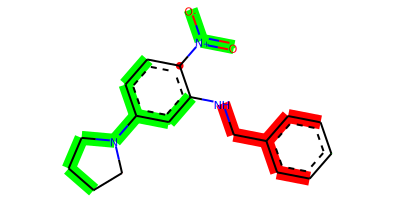

In [7]:
img

In [8]:
svg, img, _, _, global_importance = molecule_importance(mol,
                                                        model,
                                                        task=0,
                                                        version=1,
                                                        vis_factor=1,
                                                        addHs=False)

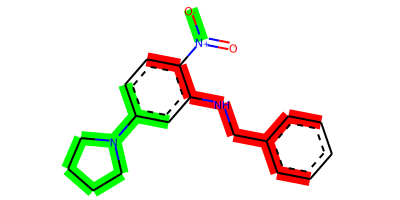

In [9]:
img